In [ ]:
import pandas as pd
import numpy as np
import nltk

In [ ]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/IMDB Dataset.csv")

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
import re
def clean_html(text):
  clean=re.compile("<.*?>")
  return re.sub(clean," ",text)
df['review']=df['review'].apply(clean_html)

In [ ]:
def remove_special(text):
    x=''

    for i in text:
        if i.isalnum():
            x=x+i
        else:
            x = x + ' '

    return x

df['review']=df['review'].apply(remove_special)

def low(text):
  new=text.lower()
  return new
df['review']=df['review'].apply(low)

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake thinks zombie...,negative
4,petter mattei love time money visually stunnin...,positive


In [ ]:
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
def lemm(text):
  y=[]
  text=text.split()
  for i in text:
    y.append(lemmatizer.lemmatize(i))
  return y
df['review']=df['review'].apply(lemm)
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,review,sentiment
0,"[one, reviewer, mentioned, watching, 1, oz, ep...",positive
1,"[wonderful, little, production, filming, techn...",positive
2,"[thought, wonderful, way, spend, time, hot, su...",positive
3,"[basically, family, little, boy, jake, think, ...",negative
4,"[petter, mattei, love, time, money, visually, ...",positive


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
df['review']=df['review'].apply(str)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['review'],
                                                    df['sentiment'],
                                                    random_state=0)
(X_test).shape

(12500,)

In [ ]:
tfidf=TfidfVectorizer(max_df=0.8,min_df=10)
# res=df['review'].apply(tfidf.fit_transform())
train_tfidf=tfidf.fit_transform(X_train)
test_tfidf=tfidf.transform(X_test)
print(tfidf.vocabulary_)
print("n_samples: %d, n_features: %d" % train_tfidf.shape)


{'story': 17212, 'two': 18643, 'dog': 5405, 'cat': 2930, 'looking': 10736, 'way': 19592, 'back': 1508, 'home': 8687, 'old': 12550, 'wise': 19832, 'golden': 7798, 'retriever': 15023, 'shadow': 16003, 'young': 20062, 'american': 836, 'bulldog': 2574, 'chance': 3061, 'sassy': 15561, 'flee': 7023, 'ranch': 14389, 'go': 7774, 'wilderness': 19770, 'reunited': 15033, 'family': 6662, 'homeward': 8696, 'bound': 2306, 'incredible': 9205, 'journey': 9901, '1993': 141, 'adventure': 544, 'directed': 5163, 'remake': 14782, '1963': 108, 'film': 6895, 'movie': 11904, 'got': 7854, 'sequel': 15922, 'three': 18097, 'year': 20030, 'later': 10329, 'michael': 11506, 'fox': 7252, 'perfect': 13204, 'man': 11029, 'voice': 19406, 'youthful': 20068, 'energy': 6093, 'brings': 2455, 'role': 15278, 'sally': 15500, 'field': 6868, 'great': 7950, 'work': 19907, 'ameche': 828, 'fantastic': 6680, 'veteran': 19268, 'actor': 443, 'second': 15803, 'last': 10321, 'also': 777, 'visible': 19375, 'kim': 10100, 'play': 13487, '

In [ ]:
clf = LogisticRegression(penalty='l2')
clf.fit(train_tfidf, y_train)

y_pred = clf.predict(test_tfidf)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

Test Accuracy:  0.89136


In [ ]:
import nltk
nltk.download('punkt')

from nltk.tokenize import (word_tokenize)
def classify_sentiment(text):
    tokens = word_tokenize(text.lower())
    words = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    text_vectorized = tfidf.transform([' '.join(words)])
    prediction = clf.predict(text_vectorized)
    return prediction

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
text1 = "movie was good"
print(classify_sentiment(text1))


['positive']


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      6291
    positive       0.88      0.90      0.89      6209

    accuracy                           0.89     12500
   macro avg       0.89      0.89      0.89     12500
weighted avg       0.89      0.89      0.89     12500



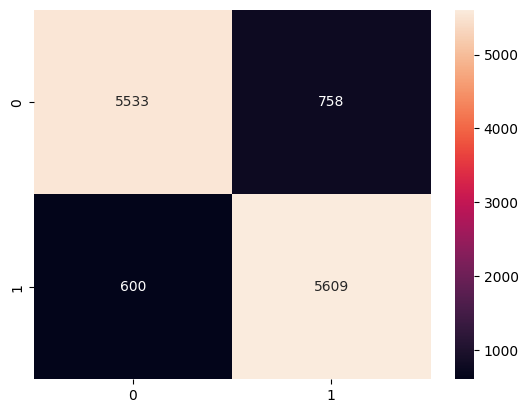

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g');